In [9]:
from ABC import ArtificialBeeColony
import numpy as np
from utils.benchmark import Rastrigin30d
import matplotlib.pyplot as plt
from tqdm import trange

In [10]:
N_BEES      = 100
LIMIT      = (N_BEES // 2) * 2
MAX_ITERS   = 1000
np.random.seed(1234)

In [11]:
N_simulations = 15
optimum_series = np.full((N_simulations,MAX_ITERS+1),np.nan)

for s in trange(N_simulations,desc='Simulations:'):
    
    ABC = ArtificialBeeColony(n_bees = N_BEES,
                            limit    = LIMIT,
                            bounds   = Rastrigin30d.bounds,
                            function = Rastrigin30d.fun)
    ABC.optimize(max_iters=MAX_ITERS,selection='RouletteWheel',random_seed=None)
    
    optimum_series[s,:] = [best_bee.value for best_bee in ABC.optimal_source_history]
    
means = np.mean(optimum_series,axis=0)
stds = np.std(optimum_series,axis=0)
lower = means - 1.96* stds/np.sqrt(N_simulations)
upper = means + 1.96* stds/np.sqrt(N_simulations)

Simulations:: 100%|██████████| 15/15 [03:55<00:00, 15.73s/it]


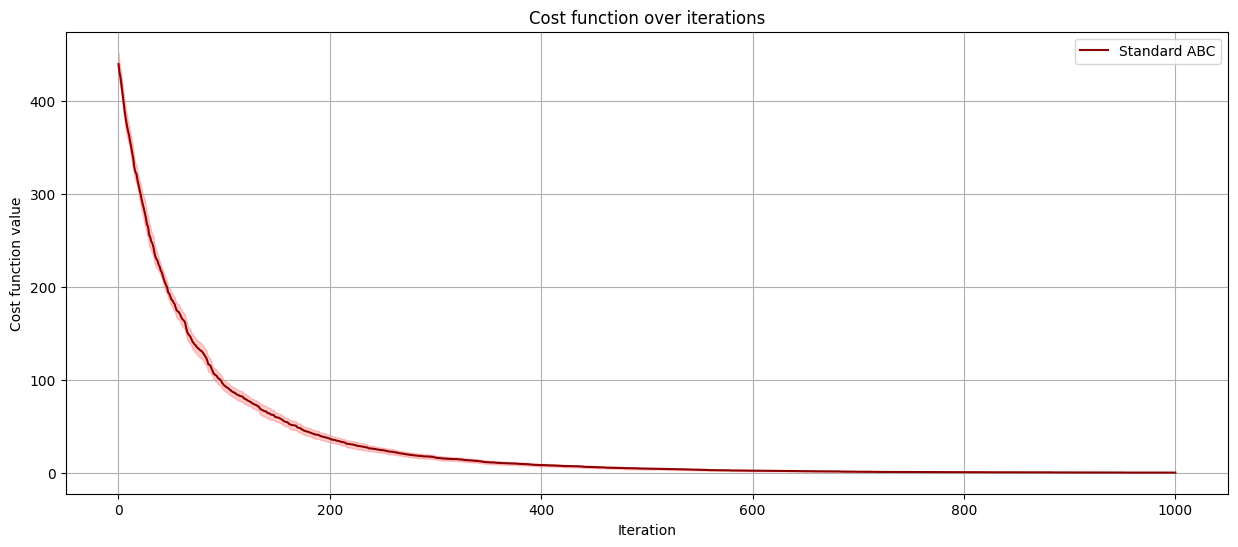

In [12]:
# Plotting the probabilistic series
plt.figure(figsize=(15, 6))
x = np.arange(MAX_ITERS+1)

plt.plot(x, means, label="Standard ABC", color="darkred")
plt.fill_between(x, lower, upper, color="red", alpha=0.2,edgecolor="red")

plt.title(f"Cost function over iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost function value")
plt.legend()
plt.grid(True)


In [15]:
low_optimum = means[-1] - 1.96* stds[-1]/np.sqrt(N_simulations)
high_optimum = means[-1] + 1.96* stds[-1]/np.sqrt(N_simulations)

CI = (low_optimum,high_optimum)
print(f'Optimum value (95% C.I.) --> {CI}')

Optimum value (95% C.I.) --> (-0.0590805618438912, 0.19306209211403175)
